In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
# preparar datos
iris = datasets.load_iris()
list(iris.keys()) # ['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
X = iris["data"][:, 3:] # achura de pétalos
y = (iris["target"] == 2).astype(int) # 1 si Iris-Virginica, sino 0

Frontera de decisión: [1.66066066]


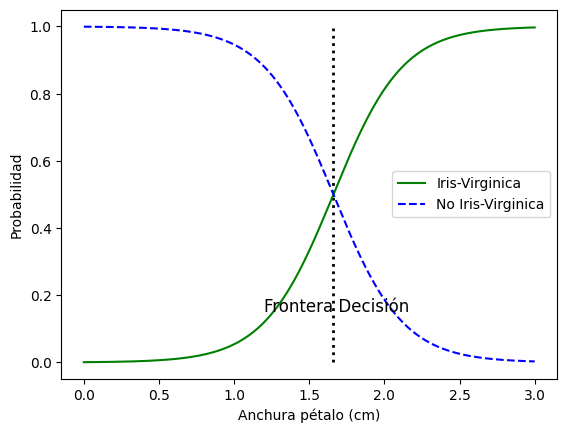

In [3]:
# Entrenar el modelo
rlog = LogisticRegression()
rlog.fit(X, y)
# Ver probabilidades estimadas según ancho de pétalo
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_prob = rlog.predict_proba(X_new)
frontera = X_new[y_prob[:, 1] >= 0.5][0]
plt.plot([frontera, frontera], [0, 1], "k:", linewidth=2)
plt.text(frontera + 0.02, 0.15, "Frontera Decisión", fontsize=12, color="k", ha="center")
plt.plot(X_new, y_prob[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_prob[:, 0], "b--", label="No Iris-Virginica")
plt.legend()
plt.xlabel("Anchura pétalo (cm)")
plt.ylabel("Probabilidad")
plt.plot()
print(f"Frontera de decisión: {frontera}")
ejemplos = [[1.7], [1.5]]

In [4]:
print(f"Predecir {ejemplos} = {rlog.predict(ejemplos)}")
print(f"Predecir con probabilidades {ejemplos} = {rlog.predict_proba(ejemplos)[1]}")

Predecir [[1.7], [1.5]] = [1 0]
Predecir con probabilidades [[1.7], [1.5]] = [0.66699864 0.33300136]


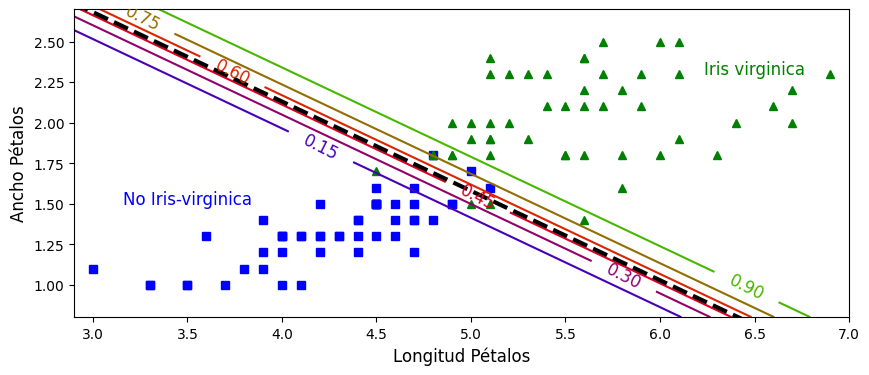

In [5]:
# preparar los datos
iris = datasets.load_iris()
X = iris["data"][:,(2, 3)] # ancho y largo de pétalos
y = (iris["target"] == 2).astype(int) # clase Iris-Virginica
# Crear y entrenar el modelo
rlog = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
rlog.fit(X, y)
# Crear una malla bidimensional de datos de anchos y longitudes
x0, x1 = np.meshgrid(
 np.linspace(2.9, 7, 500).reshape(-1, 1),
 np.linspace(0.8, 2.7, 200).reshape(-1, 1),
 )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = rlog.predict_proba(X_new) # Obtener probabilidades de los datos
# Crear el gráfico
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
zz = y_proba[:, 1].reshape(x0.shape)
contorno = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
izq_der = np.array([2.9, 7])
frontera = -(rlog.coef_[0][0] * izq_der + rlog.intercept_[0]) / rlog.coef_[0][1]
plt.clabel(contorno, inline=1, fontsize=12)
plt.plot(izq_der, frontera, "k--", linewidth=3)
plt.text(3.5, 1.5, "No Iris-virginica", fontsize=12, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=12, color="g", ha="center")
plt.xlabel("Longitud Pétalos", fontsize=12)
plt.ylabel("Ancho Pétalos", fontsize=12)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()
